1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [1]:
import pandas as pd

# 文件路径
file_path = "C:/Users/Chlor/Downloads/open_rank_20236.csv"

# 读取数据
data = pd.read_csv(file_path)

# 计算统计量
max_value = data['value'].max()
min_value = data['value'].min()
mean_value = data['value'].mean()
median_value = data['value'].median()

# 打印结果
print("美国排名前100的项目的统计信息：")
print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")


美国排名前100的项目的统计信息：
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [1]:
import pandas as pd

# 文件路径
file_path = "C:/Users/Chlor/Downloads/activity_2022.csv"

# 读取数据
data = pd.read_csv(file_path)

projects = data.set_index('repo')

# 计算每个项目的月增长率
growth_rates = projects.pct_change(axis=1)  # 计算每月相对增长率
average_growth_rate = growth_rates.mean(axis=1)  # 每个项目的平均增长率

# 打印结果
print("每个项目的平均每月增长率：")
print(average_growth_rate)


每个项目的平均每月增长率：
repo
MicrosoftDocs/azure-docs                 -0.017928
NixOS/nixpkgs                             0.000295
dotnet/runtime                           -0.022848
elastic/kibana                           -0.003651
firstcontributions/first-contributions    0.140824
flutter/flutter                          -0.012404
home-assistant/core                       0.008453
microsoft/vscode                          0.022905
pytorch/pytorch                           0.013160
rust-lang/rust                           -0.003778
dtype: float64


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [4]:
import pandas as pd

china_data = pd.read_csv("C:/Users/Chlor/Downloads/china_2022.csv")

global_data = pd.read_csv("C:/Users/Chlor/Downloads/global_2022.csv")

def calculate_statistics(df, label):
    total = df.sum(numeric_only=True)
    average = df.mean(numeric_only=True)
    return pd.DataFrame({
        'Metric': total.index,
        f'{label}_Total': total.values,
        f'{label}_Average': average.values
    })

china_stats = calculate_statistics(china_data, 'China')
global_stats = calculate_statistics(global_data, 'Global')

comparison = pd.merge(china_stats, global_stats, on='Metric', how='outer')


print("总体比较：")
print(comparison)


总体比较：
           Metric  China_Total  China_Average  Global_Total  Global_Average
0   issue_comment    612055.00      61205.500    3414094.00      341409.400
1     merged_pull    137641.00      13764.100     624720.00       62472.000
2      open_issue     91692.00       9169.200     433002.00       43300.200
3       open_pull    169127.00      16912.700     834230.00       83423.000
4            rank        55.00          5.500         55.00           5.500
5       rankDelta        53.00          5.300          1.00           0.100
6  review_comment    198575.00      19857.500    1203921.00      120392.100
7           value    402695.34      40269.534    2158554.91      215855.491
8      valueDelta     92650.07       9265.007     119069.21       11906.921


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [5]:
# 给定数据
total_projects = 10000
tool_component_projects = 0.50 * total_projects
system_application_projects = 0.25 * total_projects
content_resource_projects = 0.25 * total_projects

# 非软件类（内容资源）项目数据
html_markdown_non_software = 0.85 * content_resource_projects
html_markdown_software = 0.10 * (tool_component_projects + system_application_projects)

# 总共有 HTML/Markdown 标签的项目数
total_html_markdown = html_markdown_non_software + html_markdown_software

# 计算给定 HTML/Markdown 标签时，项目是非软件类项目的概率
probability_non_software_given_html_markdown = html_markdown_non_software / total_html_markdown
print(probability_non_software_given_html_markdown)


0.7391304347826086


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [6]:
# 工具组件型项目中，使用 JavaScript 的项目占比
js_tool_component = 0.35 * tool_component_projects

# 所有项目中，使用 JavaScript 的项目占比
js_all_projects = 0.35 * tool_component_projects + 0.10 * (system_application_projects + content_resource_projects)

# 计算给定项目是由 JavaScript 语言编写时，它是工具组件型项目的概率
probability_tool_component_given_js = js_tool_component / js_all_projects
print(probability_tool_component_given_js)


0.7777777777777778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

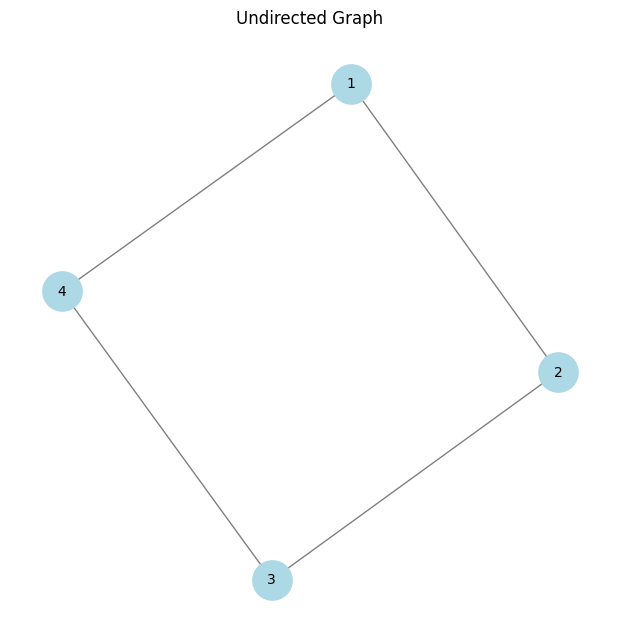

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
users = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10)
plt.title("Undirected Graph")
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

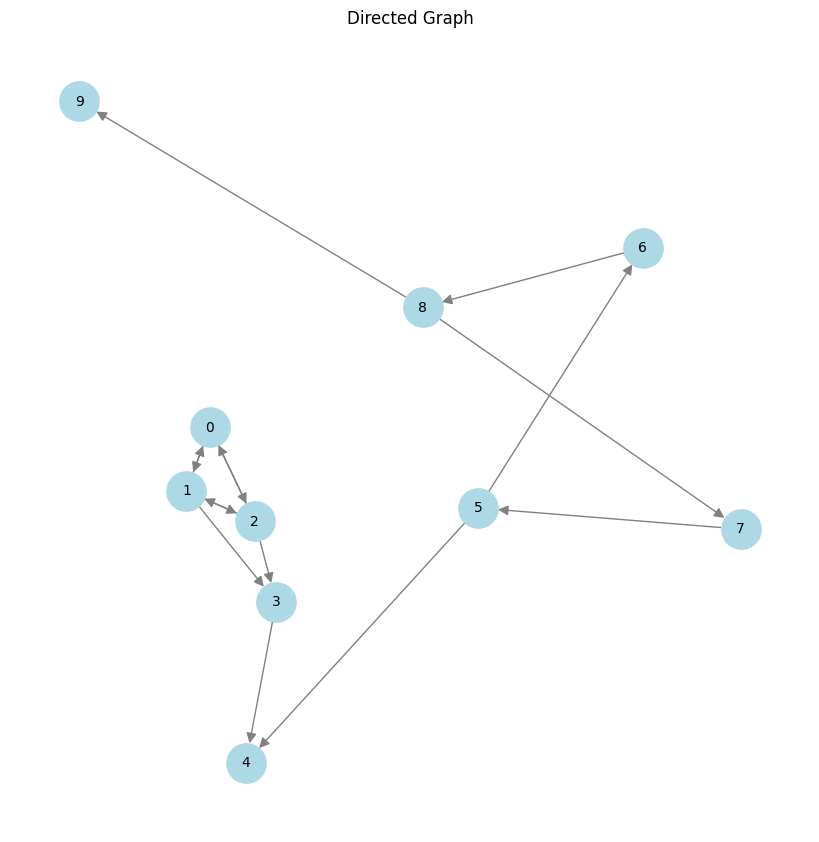

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]

# 创建有向图
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制有向图
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # 使用spring布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', 
        node_size=800, font_size=10, arrowsize=15)
plt.title("Directed Graph")
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank values:
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


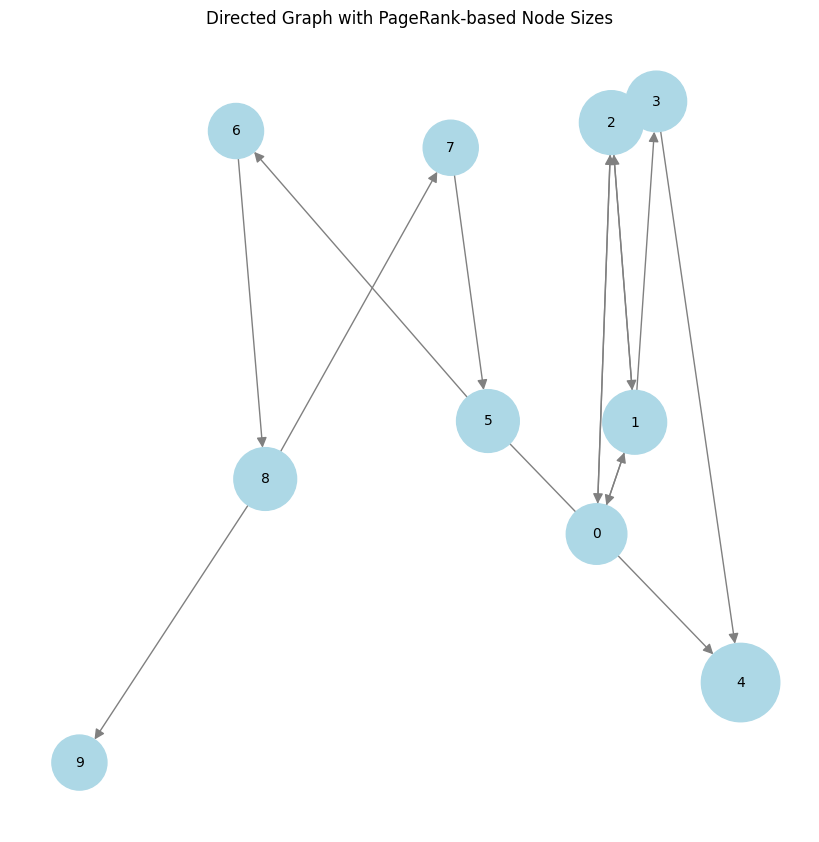

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [
    (0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
    (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
    (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)
]

# 创建有向图
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 计算 PageRank
pagerank_values = nx.pagerank(G)

# 输出 PageRank 值
print("PageRank values:")
for node, pr in pagerank_values.items():
    print(f"Node {node}: {pr:.4f}")

# 根据 PageRank 调整节点大小
node_sizes = [20000 * pagerank_values[node] for node in G.nodes] #用20000使大小差异更明显

# 绘制有向图
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # 使用spring布局
nx.draw(
    G, pos, with_labels=True, node_color='lightblue', edge_color='gray', 
    node_size=node_sizes, font_size=10, arrowsize=15
)
plt.title("Directed Graph with PageRank-based Node Sizes")
plt.show()